# Age Group Effects

### GLM Setup

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
data_dir = '/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/'

In [166]:
d = []
d = pd.read_csv(data_dir + 'dataset_2020-04-09.csv')
d = d.sort_values('record_id', ascending = True)
d['sex'] = np.where(d['sex'] == 'Female', 0, 1)
d[0:5]

,record_id,actamp,actbeta,actphi,actmin,actmesor,actupmesor,actdownmesor,actalph,actwidthratio,...,cowat_zscore,cowat_perseveration,cowat_errors,time_trails_a,error_trails_a,trails_a_z_score,time_trails_b,error_trails_b,trails_b_z_score,neuropsych_scoring_complete
0,30003,1.389856,21.815009,14.373034,0.541285,1.236213,6.117306,22.628763,-0.556815,0.687977,...,NaN,NaN,NaN,35.0,0.0,-1.756914,97.0,0.0,-3.784870,2.0
1,30004,1.630892,4.438790,15.128163,0.000000,0.815446,6.927406,23.328920,-0.544804,0.683396,...,NaN,NaN,NaN,25.0,0.0,-0.068886,59.0,0.0,-0.673139,2.0
2,30008,1.610484,7.306045,15.569911,0.139627,0.944868,7.708287,23.431534,-0.468304,0.655135,...,NaN,NaN,NaN,27.0,0.0,-0.592431,60.0,1.0,-0.869188,2.0
3,30009,1.951245,7.026165,14.377649,0.081641,1.057264,6.388996,22.366302,-0.497424,0.665721,...,NaN,NaN,NaN,35.0,0.0,-1.216992,61.0,0.0,-0.834951,2.0
4,30012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.0,1.0,-1.216992,54.0,0.0,-0.268608,2.0


In [167]:
oa_files = []
oa_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_oa/origdata'), columns = ['files'])
oa_files['record_id'] = oa_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
oa_files = oa_files.drop('files', axis=1)
oa_files = oa_files.set_index('record_id')

oa_df = []
oa_df = d[d['Group'] == 'Older Adults']
oa_df = oa_df.set_index('record_id')

oa_dsn = []
oa_dsn = oa_files.join(oa_df, sort=True).dropna(subset = ['files'])

In [168]:
oa_dsn.shape

(57, 741)

In [169]:
ya_files = []
ya_files = pd.DataFrame(os.listdir(scan_dir + '/tbss_ya/origdata'), columns = ['files'])
ya_files['record_id'] = ya_files['files'].str.split('-', expand = True)[1].str.split('_', expand = True)[0].astype(int)
ya_files = ya_files.drop('files', axis=1)
ya_files = ya_files.set_index('record_id')

ya_df = []
ya_df = d[d['Group'] == 'Young Adults']
ya_df = ya_df.set_index('record_id')

ya_dsn = []
ya_dsn = ya_files.join(ya_df, sort=True).dropna(subset = ['files'])

In [170]:
ya_dsn.shape

(46, 741)

## TBSS Analysis

1. Concatenate all_FA images
2. Run fsl randomise looking for interaction of age group x RAR amplitude

In [7]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmerge -h

printf "\nYoung Adults All FA\n"
fslinfo tbss_ya/stats/all_FA

printf "\nOlder Adults All FA\n"
fslinfo tbss_oa/stats/all_FA


Usage: fslmerge <-x/y/z/t/a/tr> <output> <file1 file2 .......> [tr value in seconds]
     -t : concatenate images in time
     -x : concatenate images in the x direction
     -y : concatenate images in the y direction
     -z : concatenate images in the z direction
     -a : auto-choose: single slices -> volume, volumes -> 4D (time series)
     -tr : concatenate images in time and set the output image tr to the final option value

Young Adults All FA
data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		46
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+

Older Adults All FA
data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		57
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


In [48]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmerge -t tbss/stats/all_FA_YA-OA tbss_ya/stats/all_FA tbss_oa/stats/all_FA

In [11]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslinfo tbss/stats/all_FA_YA-OA

data_type	FLOAT32
dim1		182
dim2		218
dim3		182
dim4		103
datatype	16
pixdim1		1.000000
pixdim2		1.000000
pixdim3		1.000000
pixdim4		1.000000
cal_max		0.000000
cal_min		0.000000
file_type	NIFTI-1+


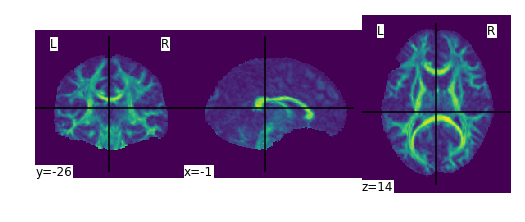

In [50]:
from nilearn import image
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'
nii = scan_dir + 'tbss/stats/all_FA_YA-OA.nii.gz'
first_vol = image.index_img(nii, 0)
plotting.plot_img(first_vol)

In [42]:
%%bash

fslmaths -h


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

In [52]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/

fslmaths tbss/stats/all_FA_YA-OA -Tmean -thr 0.25 -bin tbss/stats/all_FA_YA-OA_mask

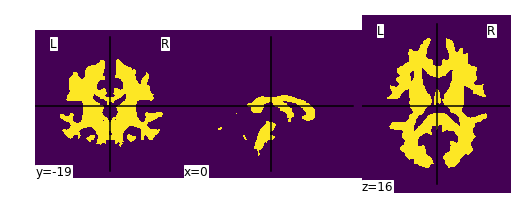

In [53]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'tbss/stats/all_FA_YA-OA_mask.nii.gz')

[FSL GLM 2 groups, continuous covariate interaction](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM#Two_Groups_with_continuous_covariate_interaction) <br>

[Mumford Brain Stats](http://mumford.fmripower.org/mean_centering/)

## Age Group Differences in WM

In [75]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

design_ttest2 dsn_ttest 46 57

In [126]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_agegroup -m all_FA_YA-OA_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2


randomise options: -i all_FA_YA-OA -o tbss_agegroup -m all_FA_YA-OA_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2 
Loading Data: 
Data loaded
4.44068e+29 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31
Star

In [127]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_agegroup*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_tstat2.nii.gz


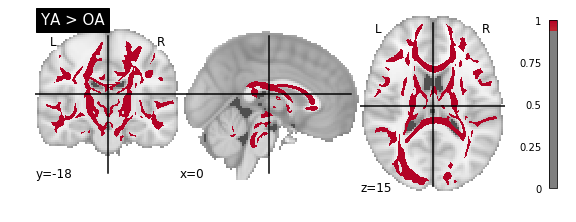

In [128]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_tfce_corrp_tstat1.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA > OA')


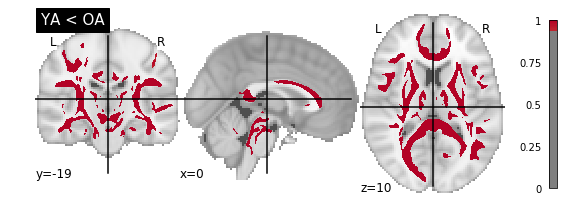

In [129]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_tfce_corrp_tstat2.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA < OA')


Why are we seeing areas of greater FA in older adults relative to young adults?

1. Checked all_FA image - First all_FA for OA corresponds to #47 of concatenated all_FA
2. Checked design matrix, matches
3. Checked contrast, matches
4. Rerun with JHU as WM mask?

### Rerun age group differences t-test using JHU atlas as mask

In [132]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/roi/

fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -bin jhumask

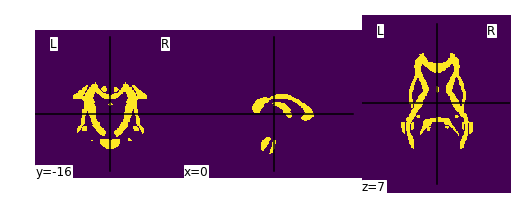

In [133]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_img(scan_dir + 'roi/jhumask.nii.gz')

In [134]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_agegroup_jhu -m ../../roi/jhumask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2


randomise options: -i all_FA_YA-OA -o tbss_agegroup_jhu -m ../../roi/jhumask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2 
Loading Data: 
Data loaded
4.44068e+29 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 31


In [135]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_agegroup_jhu*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_agegroup_jhu_tstat2.nii.gz


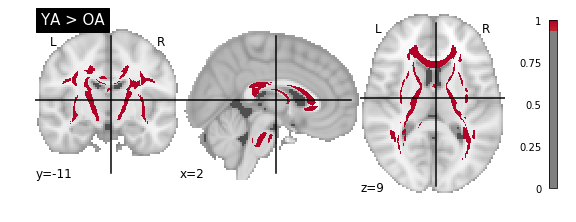

In [143]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat1.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA > OA')


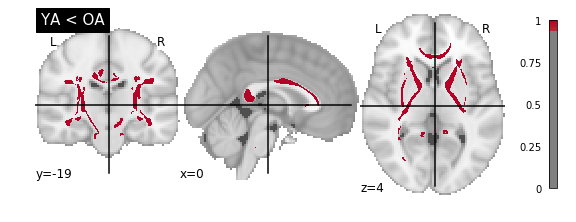

In [142]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_agegroup_jhu_tfce_corrp_tstat2.nii.gz', cmap = 'coolwarm', threshold = 0.95, title = 'YA < OA')


Still seeing some regions where OA FA > YA FA?

### Rerun interaction model with JHU mask

In [145]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats

randomise -i all_FA_YA-OA -o tbss_int_jhu -m ../../roi/jhumask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D


randomise options: -i all_FA_YA-OA -o tbss_int_jhu -m ../../roi/jhumask -d ya_oa_amp-ya_amp-oa.mat -t int.con -n 500 --T2 -D 
Loading Data: 
Data loaded
1.70561e+156 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutation 

In [146]:
%%bash

ls /Volumes/G-DRIVE\ mobile/derivatives/tbss/stats/tbss_int_jhu*

/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tfce_corrp_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tfce_corrp_tstat2.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tstat1.nii.gz
/Volumes/G-DRIVE mobile/derivatives/tbss/stats/tbss_int_jhu_tstat2.nii.gz


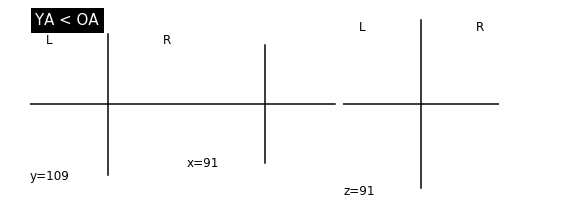

In [151]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_jhu_tfce_corrp_tstat1.nii.gz', threshold = 0.95, title = 'YA < OA')


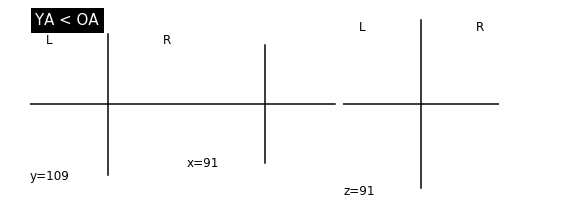

In [152]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/stats/tbss_int_jhu_tfce_corrp_tstat2.nii.gz', threshold = 0.95, title = 'YA < OA')


No significant interaction effect

## FA Skeleton

In [1]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

design_ttest2 dsn_ttest 46 57

In [2]:
%%bash

cd /Volumes/G-DRIVE\ mobile/derivatives/tbss/new

randomise -i all_FA_skeletonised -o tbss_agegroup -m mean_FA_skeleton_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2


randomise options: -i all_FA_skeletonised -o tbss_agegroup -m mean_FA_skeleton_mask -d dsn_ttest.mat -t dsn_ttest.con -n 500 --T2 
Loading Data: 
Data loaded
4.44068e+29 permutations required for exhaustive test of t-test 1
Doing 500 random permutations
Starting permutation 1 (Unpermuted data)
Starting permutation 2
Starting permutation 3
Starting permutation 4
Starting permutation 5
Starting permutation 6
Starting permutation 7
Starting permutation 8
Starting permutation 9
Starting permutation 10
Starting permutation 11
Starting permutation 12
Starting permutation 13
Starting permutation 14
Starting permutation 15
Starting permutation 16
Starting permutation 17
Starting permutation 18
Starting permutation 19
Starting permutation 20
Starting permutation 21
Starting permutation 22
Starting permutation 23
Starting permutation 24
Starting permutation 25
Starting permutation 26
Starting permutation 27
Starting permutation 28
Starting permutation 29
Starting permutation 30
Starting permutat

In [5]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/dsn_ttest.mat

/NumWaves 2
/NumPoints 103
/PPheights 1 1
/Matrix
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1


In [4]:
%%bash

more /Volumes/G-DRIVE\ mobile/derivatives/tbss/new/dsn_ttest.con

/NumWaves 2
/NumContrasts 2
/PPheights 1 1
/Matrix
1 -1
-1 1


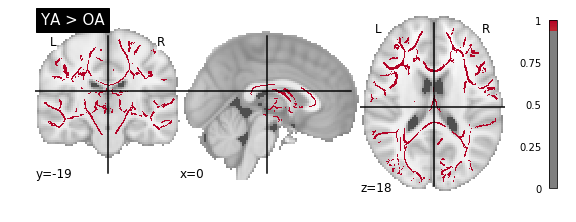

In [8]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_agegroup_tfce_corrp_tstat1.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA > OA')


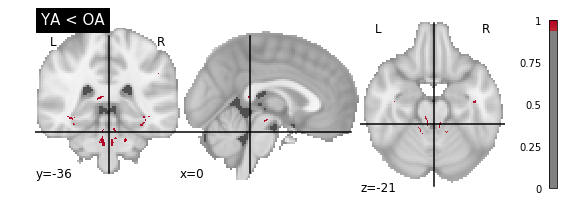

In [7]:
from nilearn import plotting

scan_dir = '/Volumes/G-DRIVE mobile/derivatives/'

plotting.plot_stat_map(scan_dir + 'tbss/new/tbss_agegroup_tfce_corrp_tstat2.nii.gz', threshold = 0.95, cmap = 'coolwarm', title = 'YA < OA')
